# 1. Описание данных

In [1]:
import pandas as pd

df = pd.read_csv('telecom_users.csv')
df = df.drop(columns='Unnamed: 0')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


Можно заметить, что данные нуждаются в доп обработке. Нужно перевести бинарные ответы в числовой формат и поменять строковые значения на числовой формат.

In [3]:
from sklearn.preprocessing import LabelEncoder

# сначала заменим бинарные ответы
proc_list = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in proc_list:
  df[col] = LabelEncoder().fit_transform(df[col])

# затем изменим тип столбика
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   int64  
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   int64  
 4   Dependents        5986 non-null   int64  
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   int64  
 7   MultipleLines     5986 non-null   int64  
 8   InternetService   5986 non-null   int64  
 9   OnlineSecurity    5986 non-null   int64  
 10  OnlineBackup      5986 non-null   int64  
 11  DeviceProtection  5986 non-null   int64  
 12  TechSupport       5986 non-null   int64  
 13  StreamingTV       5986 non-null   int64  
 14  StreamingMovies   5986 non-null   int64  
 15  Contract          5986 non-null   int64  
 16  PaperlessBilling  5986 non-null   int64  


Отлично получилось, но образовалось несколько Nan. Чтобы не терять данные вставим вместо Nan среднее по столбцу.

In [4]:
tc_mean = df['TotalCharges'].agg('mean')
df = df.fillna(tc_mean)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   int64  
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   int64  
 4   Dependents        5986 non-null   int64  
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   int64  
 7   MultipleLines     5986 non-null   int64  
 8   InternetService   5986 non-null   int64  
 9   OnlineSecurity    5986 non-null   int64  
 10  OnlineBackup      5986 non-null   int64  
 11  DeviceProtection  5986 non-null   int64  
 12  TechSupport       5986 non-null   int64  
 13  StreamingTV       5986 non-null   int64  
 14  StreamingMovies   5986 non-null   int64  
 15  Contract          5986 non-null   int64  
 16  PaperlessBilling  5986 non-null   int64  


Всё переведено в нужный формат. Пропущенных значений нет.

# 2. Исследование зависимостей и формулирование гипотез

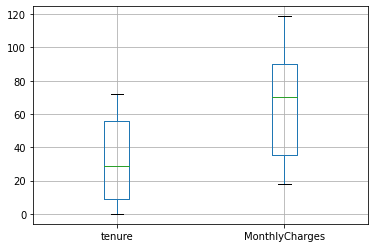

In [5]:
df.boxplot(column=['tenure', 'MonthlyCharges'])

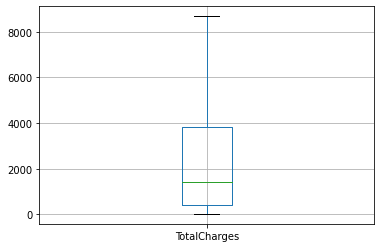

In [6]:
df.boxplot('TotalCharges')

Числовые данные довольно ровные. Нет никаких выбросов.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76ed55da20>,
      dtype=object)

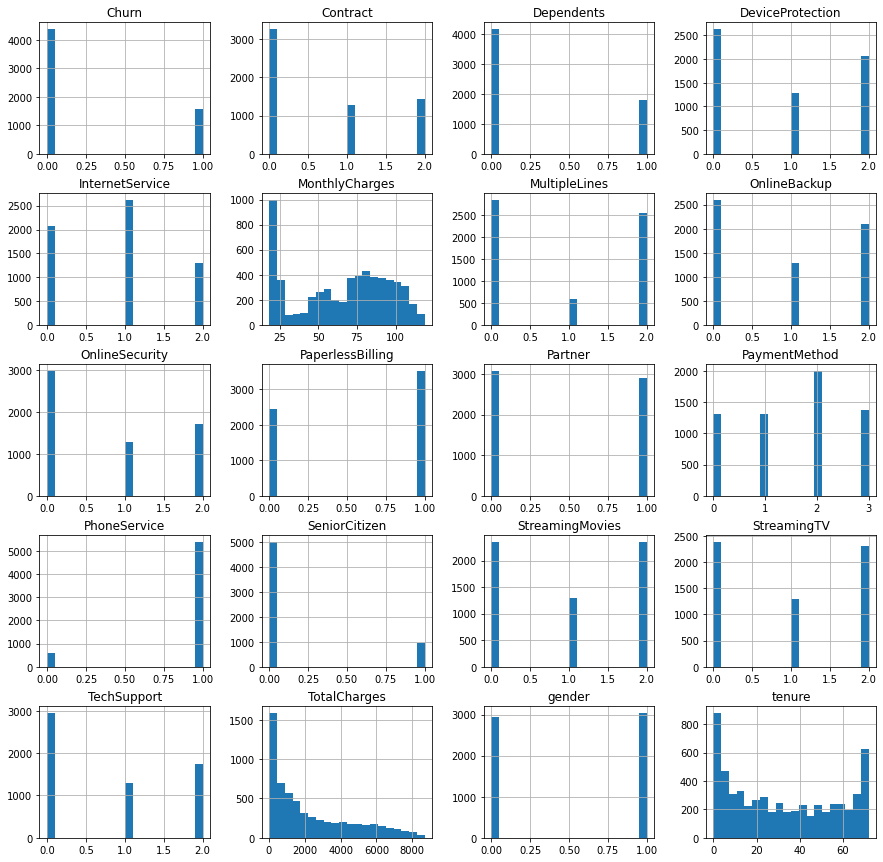

In [7]:
df.hist(figsize=(15,15), bins=20)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


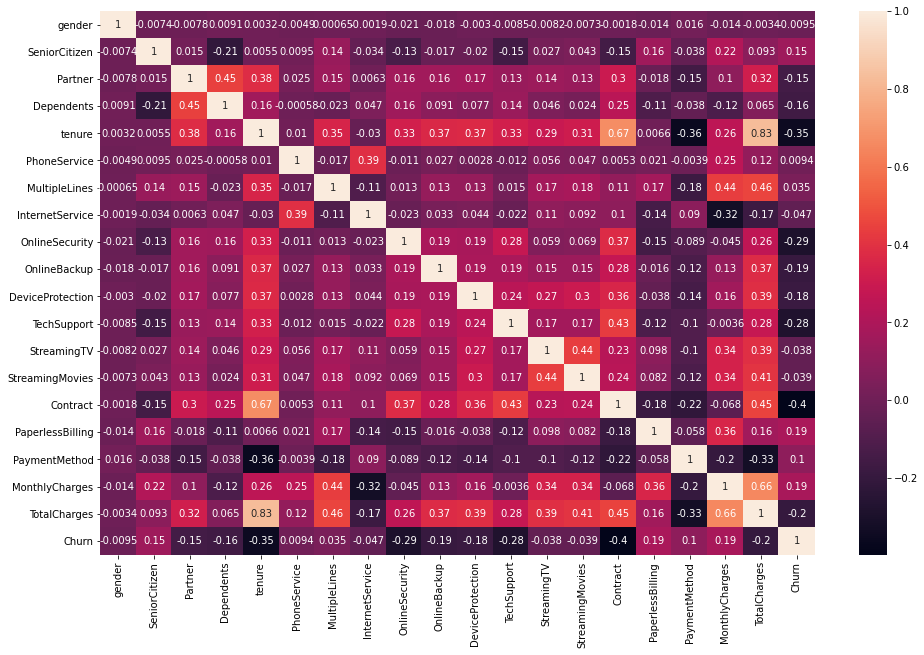

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

mtrx_corr = df.corr()

plt.figure(figsize = (16, 10))
sns.heatmap(mtrx_corr, annot=True)

Видно, что наиболее сильно влияют на отток следующие признаки: SeniorCitizen, Partner, Dependents, tenure, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges, TotalCharges. Но так как некоторые из них коррелируют друг другом, то оставлю только следующие: Dependents, OnlineSecurity, TechSupport, SeniorCitizen, Contract, tenure, PaperlessBilling, MonthlyCharges.

In [9]:
# датасет для моделей
data = df[
          ['Dependents', 'OnlineSecurity', 'TechSupport', 'SeniorCitizen',
           'Contract', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'Churn']
          ]

data.head()

,Dependents,OnlineSecurity,TechSupport,SeniorCitizen,Contract,tenure,PaperlessBilling,MonthlyCharges,Churn
0,1,1,1,0,2,72,0,24.10,0
1,0,0,0,0,0,44,1,88.15,0
2,0,0,0,1,0,38,1,74.95,1
3,0,0,0,0,0,4,1,55.90,0
4,0,2,0,0,0,2,0,53.45,0


# 3. Построение моделей для прогнозирования оттока

In [10]:
# разделим данные на тренировочные и тестовые
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = data.drop('Churn', axis=1).values
y = data.Churn.values

# выполню стандартизацию для сглаживания данных
x = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=17)

# 1) K-Means
Первой моделью я выбираю K-Means, так как она идеально подходит для задачи разбиения признаков на 2 группы.

In [11]:
# библиотеки
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

km = KMeans(n_clusters=2, random_state=17)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=17, tol=0.0001, verbose=0)

In [12]:
import numpy as np

# перевод матрицы для оценки AMI
y_ami = y.flatten()

sil_score = silhouette_score(x, km.labels_)
ami_score = adjusted_mutual_info_score(y_ami, km.labels_)

print('Silhouette score {}\nAMI score {}'.format(
    np.round(sil_score, decimals=2), np.round(ami_score, decimals=2)))

Silhouette score 0.22
AMI score 0.14


Результат получился очень слабым.

# 2) K-Nearest Neighbors
Небольшой датасет и отлично разделенные классы делают этот алгоритм подходящим.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

kn = KNeighborsClassifier()
kn.fit(x_train, y_train)
kn_pred = kn.predict(x_test)

"""
так как часто буду рассчитывать точность модели, то напишу функцию 
для расчёта всех оценок
"""

def all_scores(y_pred, y_true=y_test):
  ras = roc_auc_score(y_true, y_pred)
  cmat = confusion_matrix(y_true, y_pred)
  crep = classification_report(y_true, y_pred)
  # введу константу D для округления оценки
  D = 2
  print('Roc auc score: {}\nConfusion matrix:\n{}\nClass report:\n{}'.format(
      np.round(ras, D), cmat, crep))
  
all_scores(kn_pred)

Roc auc score: 0.67
Confusion matrix:
[[774 109]
 [169 146]]
Class report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       883
           1       0.57      0.46      0.51       315

    accuracy                           0.77      1198
   macro avg       0.70      0.67      0.68      1198
weighted avg       0.76      0.77      0.76      1198



Хорошая точность, но посредственная оценка precision для первого класса. Возможно нужно больше баланса в целевой переменной.

# 3) Support Vector Machines
Этот алгоритм отлично подходит для бинароной классификации.

In [14]:
from sklearn.svm import SVC

sc = SVC()
sc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
sc_pred = sc.predict(x_test)

all_scores(sc_pred)

Roc auc score: 0.68
Confusion matrix:
[[812  71]
 [174 141]]
Class report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       883
           1       0.67      0.45      0.54       315

    accuracy                           0.80      1198
   macro avg       0.74      0.68      0.70      1198
weighted avg       0.78      0.80      0.78      1198



Отличная оценка! Очень мало FP, хорошая оценка precision. Однозначно подходящий алгоритм.

# 4) GaussianNB
Отличный алгоритм обучения известный своей простотой и хорошими показателями на малых данных.

In [16]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
gnb_pred = gnb.predict(x_test)

all_scores(gnb_pred)

Roc auc score: 0.71
Confusion matrix:
[[670 213]
 [104 211]]
Class report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       883
           1       0.50      0.67      0.57       315

    accuracy                           0.74      1198
   macro avg       0.68      0.71      0.69      1198
weighted avg       0.77      0.74      0.75      1198



Очень много FP, но в целом неплохая точность.

# 5) Decision Tree Classifier
Отлично интерпритируемый алгоритм обучения. 

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
print(export_text(dtc))

|--- feature_4 <= -0.23
|   |--- feature_1 <= -0.33
|   |   |--- feature_5 <= -0.90
|   |   |   |--- feature_7 <= 0.14
|   |   |   |   |--- feature_5 <= -1.14
|   |   |   |   |   |--- feature_6 <= -0.18
|   |   |   |   |   |   |--- feature_7 <= -0.66
|   |   |   |   |   |   |   |--- feature_3 <= 0.92
|   |   |   |   |   |   |   |   |--- feature_7 <= -1.34
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_7 >  -1.34
|   |   |   |   |   |   |   |   |   |--- feature_7 <= -1.32
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.44
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  0.44
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_7 >  -1.32
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= -1.22
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   

Из-за большого количества признаков дерево получилось огромным!

In [20]:
dtc_pred = dtc.predict(x_test)

all_scores(dtc_pred)

Roc auc score: 0.67
Confusion matrix:
[[732 151]
 [151 164]]
Class report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       883
           1       0.52      0.52      0.52       315

    accuracy                           0.75      1198
   macro avg       0.67      0.67      0.67      1198
weighted avg       0.75      0.75      0.75      1198



Хорошая точность и очень сбалансированная матрица ошибок. Интересный результат.

Из оставшихся алгоритмов я не стал использовать логистическую регрессию, так как она выдаёт достойный результат на большом количестве данных.

# 4. Сравнение качества моделей 

Проанализировав результаты всех 5 алгоритмов я отмеваю вариант кластеризации, так как там самая худшая оценка. Отлично показал себя SVM и DTC. Попробую подобрать наилучшие параметры для всех моделей, чтобы посмотреть насколько они улучшатся.

Текущий топ по точности:
1) SVM
2) KNN
3) DTC
4) GNB

In [21]:
from sklearn.model_selection import GridSearchCV

kn_param = {
    'n_neighbors': [1, 3, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 3, 6, 10]
}

kn_grid = GridSearchCV(kn, kn_param)
kn_grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 7, 9, 11], 'p': [1, 3, 6, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
kn_grid_pred = kn_grid.predict(x_test)

all_scores(kn_grid_pred)

Roc auc score: 0.69
Confusion matrix:
[[791  92]
 [165 150]]
Class report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       883
           1       0.62      0.48      0.54       315

    accuracy                           0.79      1198
   macro avg       0.72      0.69      0.70      1198
weighted avg       0.77      0.79      0.78      1198



Не очень большая прибавка к точности.

In [23]:
sc_param = {
    'C': [0.01, 0.05, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': [0.1, 0.5, 'scale']
}

sc_grid = GridSearchCV(sc, sc_param)
sc_grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1, 1],
                         'gamma': [0.1, 0.5, 'scale'],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
sc_grid_pred = sc_grid.predict(x_test)

all_scores(sc_grid_pred)

Roc auc score: 0.68
Confusion matrix:
[[812  71]
 [174 141]]
Class report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       883
           1       0.67      0.45      0.54       315

    accuracy                           0.80      1198
   macro avg       0.74      0.68      0.70      1198
weighted avg       0.78      0.80      0.78      1198



Совсем не увеличилась точность.

In [25]:
dtc_param = {
    'max_depth': [1, 3, 5, 7, 9]
}

dtc_grid = GridSearchCV(dtc, dtc_param)
dtc_grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 3, 5, 7, 9]}, pre_dispatch='2*n_j

In [26]:
dtc_grid_pred = dtc_grid.predict(x_test)

all_scores(dtc_grid_pred)

Roc auc score: 0.67
Confusion matrix:
[[821  62]
 [184 131]]
Class report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       883
           1       0.68      0.42      0.52       315

    accuracy                           0.79      1198
   macro avg       0.75      0.67      0.69      1198
weighted avg       0.78      0.79      0.78      1198



Хорошее увеличение точности.
В итоге только 2 модели получилось с самыми достойными результатами: SVM и DTC.
 

In [27]:
all_scores(sc_grid_pred)

Roc auc score: 0.68
Confusion matrix:
[[812  71]
 [174 141]]
Class report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       883
           1       0.67      0.45      0.54       315

    accuracy                           0.80      1198
   macro avg       0.74      0.68      0.70      1198
weighted avg       0.78      0.80      0.78      1198



In [28]:
all_scores(dtc_grid_pred)

Roc auc score: 0.67
Confusion matrix:
[[821  62]
 [184 131]]
Class report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       883
           1       0.68      0.42      0.52       315

    accuracy                           0.79      1198
   macro avg       0.75      0.67      0.69      1198
weighted avg       0.78      0.79      0.78      1198



SVM немного лучше по точности. Показатель Recall для обоих классов достаточно высок.
У DTC Precision чуть лучше, также модель легко интерпритируется. По сравнению с SVM количество FP сильно ощущается.
Обе модели достойно справляются с задачей классификации оттока клиентов.
Дополнительно можно воспользоваться PCA для всех признаков, предварительно их стадратизировав и ещё раз проверить точность этих и других моделей.